<a href="https://colab.research.google.com/github/NibrasAz7/Iris_Recognition/blob/main/Iris_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
train_dir = '/content/gdrive/MyDrive/CASIA-Iris-Interval/Train'
validation_dir = '/content/gdrive/MyDrive/CASIA-Iris-Interval/Val'

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(280,320),
    batch_size=20,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(280,320),
    batch_size=20,
    class_mode='categorical'
)

Found 42 images belonging to 3 classes.
Found 18 images belonging to 3 classes.


In [ ]:
from keras import layers
from keras import models

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D((32),(3,3), strides=(1,1), activation = "relu", input_shape = (280,320,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Dropout(0.1))

model.add(layers.Conv2D(64, (3,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Dropout(0.1))

model.add(layers.Conv2D(128, (3,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Dropout(0.1))

model.add(layers.Flatten())
model.add(layers.Dense(1028, activation= "relu"))
model.add(layers.Dense(512, activation= "relu"))
model.add(layers.Dense(64, activation= "relu"))
model.add(layers.Dense(3, activation= "softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 278, 318, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 139, 159, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 139, 159, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 137, 157, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 68, 78, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 68, 78, 64)        0

In [ ]:
from keras import optimizers
import tensorflow as tf

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.000001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
history = model.fit(train_generator, steps_per_epoch=50, epochs=400,
          validation_data=validation_generator, validation_steps=1)


Epoch 1/400
1/1 [==============================] - 7s 7s/step - loss: 1.3104 - accuracy: 0.0000e+00 - val_loss: 1.1066 - val_accuracy: 0.3333
Epoch 2/400
1/1 [==============================] - 0s 248ms/step - loss: 1.1744 - accuracy: 0.0000e+00 - val_loss: 1.1017 - val_accuracy: 0.3333
Epoch 3/400
1/1 [==============================] - 2s 2s/step - loss: 1.0912 - accuracy: 0.4500 - val_loss: 1.0990 - val_accuracy: 0.3333
Epoch 4/400
1/1 [==============================] - 0s 234ms/step - loss: 1.0369 - accuracy: 1.0000 - val_loss: 1.1006 - val_accuracy: 0.3333
Epoch 5/400
1/1 [==============================] - 0s 242ms/step - loss: 1.0127 - accuracy: 0.5000 - val_loss: 1.1045 - val_accuracy: 0.3333
Epoch 6/400
1/1 [==============================] - 0s 238ms/step - loss: 1.2666 - accuracy: 0.0000e+00 - val_loss: 1.1079 - val_accuracy: 0.3333
Epoch 7/400
1/1 [==============================] - 0s 213ms/step - loss: 1.0125 - accuracy: 0.5000 - val_loss: 1.1129 - val_accuracy: 0.3333
Epoch 8

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
accuracy = history.history['accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

In [ ]:
epochs = range(1, len(accuracy) + 1)

In [ ]:
# Define a function to calculate the moving average
def moving_average(data, window_size):
    weights = np.repeat(1.0, window_size) / window_size
    return np.convolve(data, weights, 'valid')

# Define the window size for the moving average (you can adjust this as needed)
window_size = 20

# Calculate the moving averages for training and validation accuracy
accuracy = moving_average(accuracy, window_size)
val_accuracy = moving_average(val_accuracy, window_size)

loss = moving_average(loss, window_size)
val_loss = moving_average(val_loss, window_size)

epochs = range(1, len(accuracy) + 1)

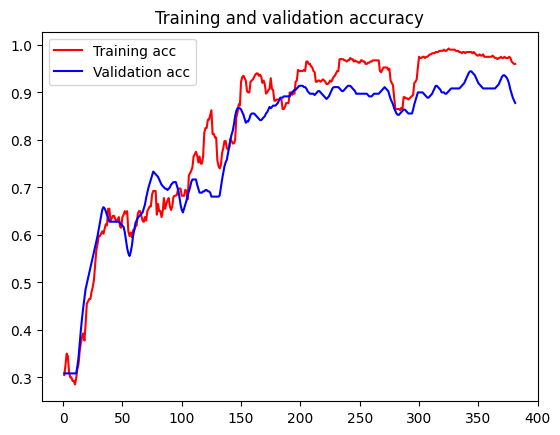

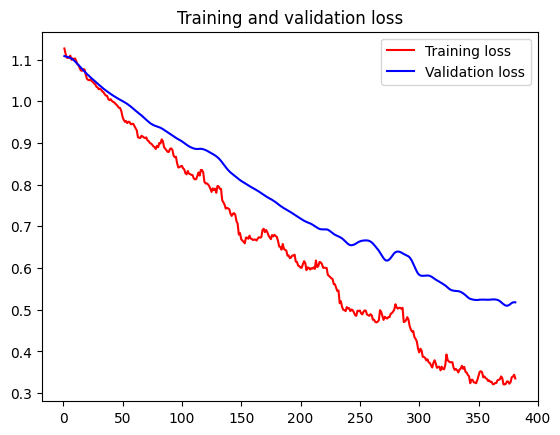

In [ ]:
import matplotlib.pyplot as plt

plt.plot(epochs, accuracy, 'r', label='Training acc')
plt.plot(epochs, val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()